In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
base_dir = Path('./imgdata/stitching_sets/mantis70/kunshan_jun14/')
lr_ind = [13]
hr_inds = [17, 8, 4, 3]

all_img_pathes = []
for img_dir in base_dir.iterdir():
    if img_dir.is_dir():
        all_img_pathes.append(img_dir / f'mcam_5013.jpeg')
        all_img_pathes.append(img_dir / 'mcam_5017.jpeg')
        all_img_pathes.append(img_dir / 'mcam_508.jpeg')
        all_img_pathes.append(img_dir / 'mcam_504.jpeg')
        all_img_pathes.append(img_dir / 'mcam_503.jpeg')
        
all_img_pathes.sort(key=lambda x: int(x.parent.stem))

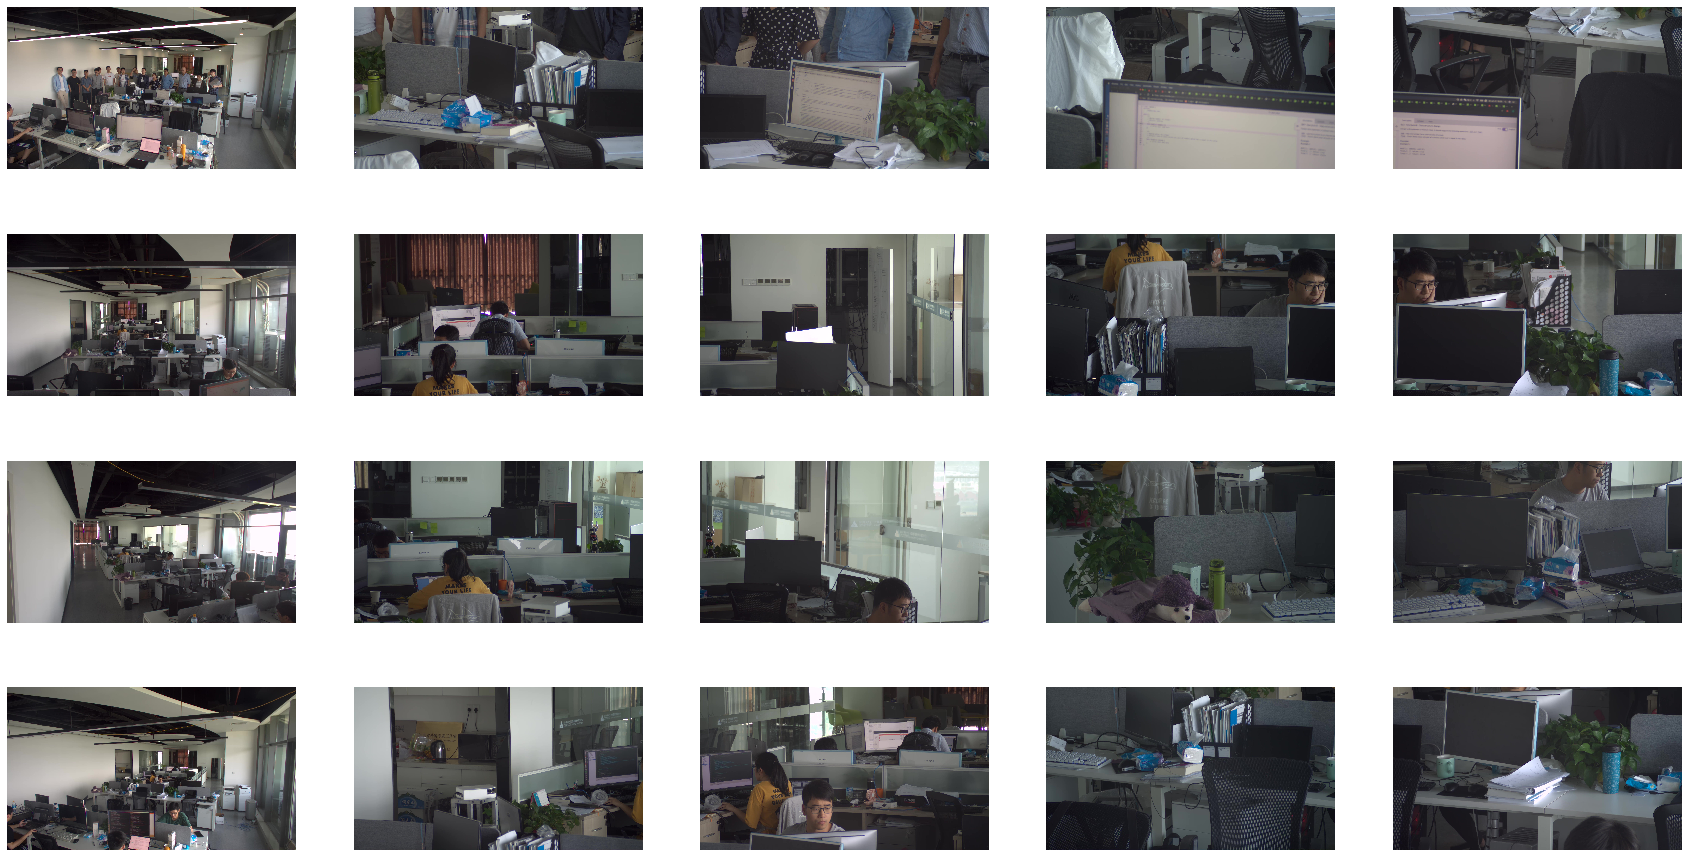

In [4]:
imgs = []
mark = 0
tmp = []

fig, axes = plt.subplots(4, 5, figsize=[30, 16])
for i, (ax, path) in enumerate(zip(axes.flatten(), all_img_pathes)):
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    tmp.append(img)
    if (i+1) % 5 == 0:
        imgs.append(tmp)
        tmp = []
    ax.imshow(img)
    ax.set_axis_off()
plt.show()

#### cv2.drawKeypoints(image, keypoints, outImage[, color[, flags]])
+ image:也就是原始图片
+ keypoints：从原图中获得的关键点，这也是画图时所用到的数据
+ outputimage：可为None
+ color：关键点颜色
+ flags：以不同的方式展示关键点
    + cv2.DRAW_MATCHES_FLAGS_DEFAULT 
    + cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    + cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
    + cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

#### 计算关键点
#### sift.detect(image[, mask])

+ image: 灰度图像
+ mask：如果你只想在图像的某个区域搜索关键点时，可使用指定mask参数

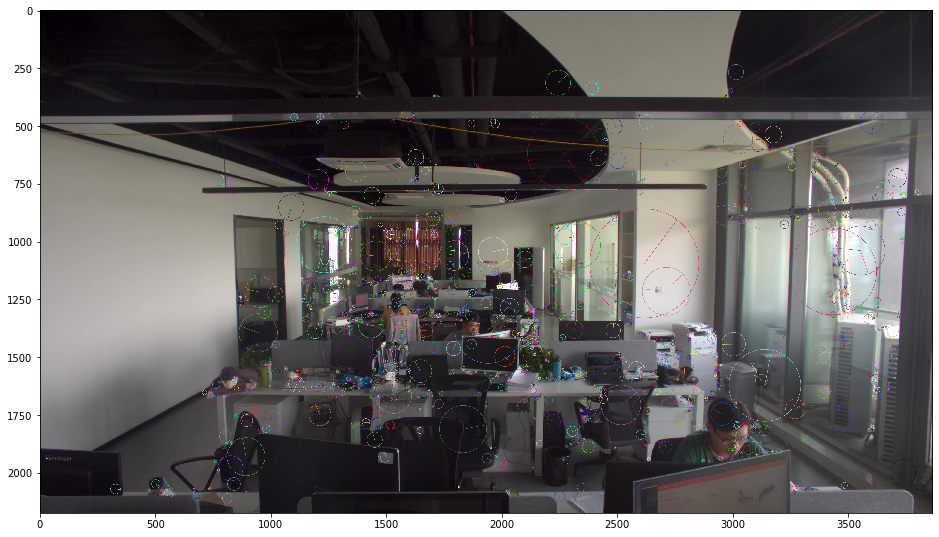

In [5]:
# opencv将SIFT等算法整合到xfeatures2d集合里面了
sift = cv2.xfeatures2d.SIFT_create()
img_gray = cv2.cvtColor(imgs[1][0], cv2.COLOR_RGB2GRAY)

# 搜索sift关键点
key_pts = sift.detect(img_gray, None)


# 展示关键点
img_copy = imgs[1][0].copy()
img_copy = cv2.drawKeypoints(img_copy, key_pts, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[16, 16])
plt.imshow(img_copy)
plt.show()

## 计算关键点描述符

#### sift.compute(image, keypoints[, descriptors])

+ Inputs:
    + image：
    + keypoints:sift.detect(img_gray, mask)计算得到的关键点
    
+ Returns:

    + kp:关键点列表
    + description：关键点描述符【每个关键点用128维的向量表示】
    
    
**也可以使用sift.detectAndCompute()一步到位得到关键点和关键点描述符**

In [42]:
kps, des = sift.compute(img_gray, key_pts)
print(kps)
print(des)

[<KeyPoint 0x7f5e2c7b7810>, <KeyPoint 0x7f5e2cdf0090>, <KeyPoint 0x7f5e2ba37030>, <KeyPoint 0x7f5e2ba37f30>, <KeyPoint 0x7f5e2ba37e70>, <KeyPoint 0x7f5e2ba37270>, <KeyPoint 0x7f5e2ba37960>, <KeyPoint 0x7f5e2ba378d0>, <KeyPoint 0x7f5e2ba37d50>, <KeyPoint 0x7f5e2ba370c0>, <KeyPoint 0x7f5e2ba372a0>, <KeyPoint 0x7f5e2ba37ba0>, <KeyPoint 0x7f5e2ba37300>, <KeyPoint 0x7f5e2ba37a50>, <KeyPoint 0x7f5e2ba37ed0>, <KeyPoint 0x7f5e2ba37ae0>, <KeyPoint 0x7f5e2ba378a0>, <KeyPoint 0x7f5e2ba37840>, <KeyPoint 0x7f5e2c7ea570>, <KeyPoint 0x7f5e2c7ea060>, <KeyPoint 0x7f5e2c7ea330>, <KeyPoint 0x7f5e2c7ea7b0>, <KeyPoint 0x7f5e2c7ea450>, <KeyPoint 0x7f5e2c7eac60>, <KeyPoint 0x7f5e2c7ea8a0>, <KeyPoint 0x7f5e2c7ea8d0>, <KeyPoint 0x7f5e2c7ea4e0>, <KeyPoint 0x7f5e2c7eab70>, <KeyPoint 0x7f5e2c7ea690>, <KeyPoint 0x7f5e2c7eaae0>, <KeyPoint 0x7f5e2c7ea4b0>, <KeyPoint 0x7f5e2c7ea480>, <KeyPoint 0x7f5e2c7eacf0>, <KeyPoint 0x7f5e2bb92840>, <KeyPoint 0x7f5e2bb92720>, <KeyPoint 0x7f5e2bb92870>, <KeyPoint 0x7f5e2bb92cf0>, 

## 总结

1. 读取图像`img`
2. 转换为灰度图像`img_gray`
3. 创建SIFT算子:`sift = cv2.xfeature2d.SIFT_create()`
4. 使用sift算子寻找关键点： `sift.detect(img_gray, mask=None)`
5. 展示得到的关键点:`cv2.drawKeyPoints(img, kpts, ...)`【可选】
6. 计算关键点描述符：`cv2.compute(img_gray, kpts)`